https://github.com/smartneeraj/QuantumRiskAnalysis/blob/main/AmplitudeEstimation.ipynb

In [132]:
import numpy as np
from qiskit import QuantumCircuit, transpile
import qiskit.providers.fake_provider as fp
from qiskit.primitives import Sampler
from qiskit_algorithms import EstimationProblem, AmplitudeEstimation
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

In [118]:
p = 0.37

In [119]:
class BernoulliA(QuantumCircuit):
    """A circuit representing the Bernoulli A operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(theta_p, 0)

In [120]:
class BernoulliQ(QuantumCircuit):
    """A circuit representing the Bernoulli Q operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        self._theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(2 * self._theta_p, 0)

    def power(self, k):
        # implement the efficient power of Q
        q_k = QuantumCircuit(1)
        q_k.ry(2 * k * self._theta_p, 0)
        return q_k

In [121]:
A = BernoulliA(p)
Q = BernoulliQ(p)

In [122]:
A.draw()

┌────────────┐
q: ┤ Ry(1.3078) ├
   └────────────┘

In [123]:
Q.draw()

┌────────────┐
q: ┤ Ry(2.6155) ├
   └────────────┘

In [124]:
problem = EstimationProblem(state_preparation=A,
                            grover_operator=Q,
                            objective_qubits=[0])

In [138]:
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())

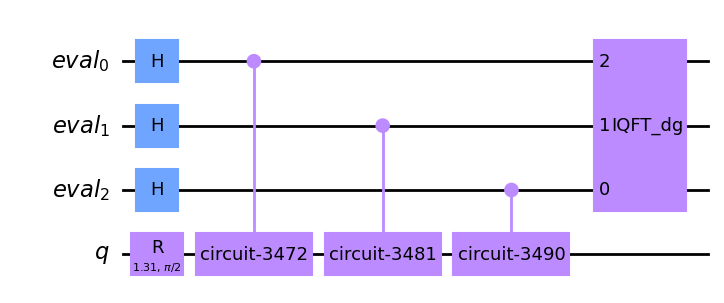

In [139]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl')

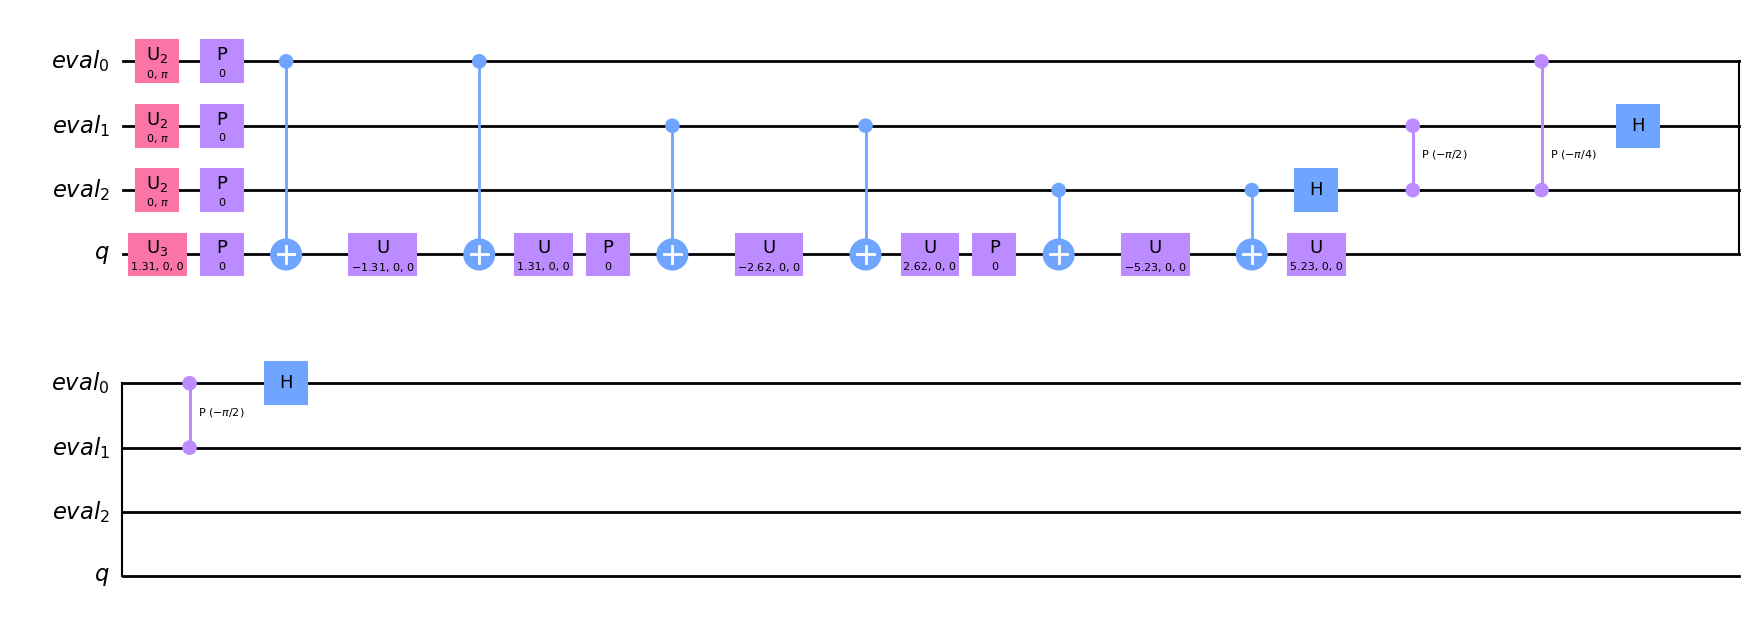

In [140]:
ae.construct_circuit(problem).decompose(reps=2).draw(output='mpl')

In [141]:
ae_result = ae.estimate(problem)

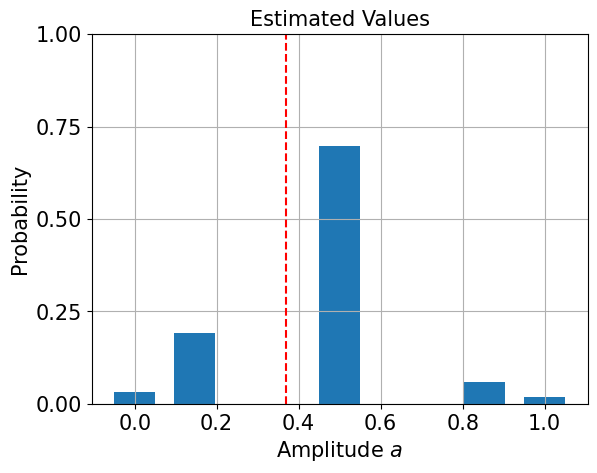

In [142]:
gridpoints = list(ae_result.samples.keys())
probabilities = list(ae_result.samples.values())

plt.bar(gridpoints, probabilities, width=0.5 / len(probabilities))
plt.axvline(p, color="r", ls="--")
plt.xticks(size=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1], size=15)
plt.title("Estimated Values", size=15)
plt.ylabel("Probability", size=15)
plt.xlabel(r"Amplitude $a$", size=15)
plt.ylim((0, 1))
plt.grid()
plt.show()

# CX 게이트수

## backend 없이

In [143]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

12

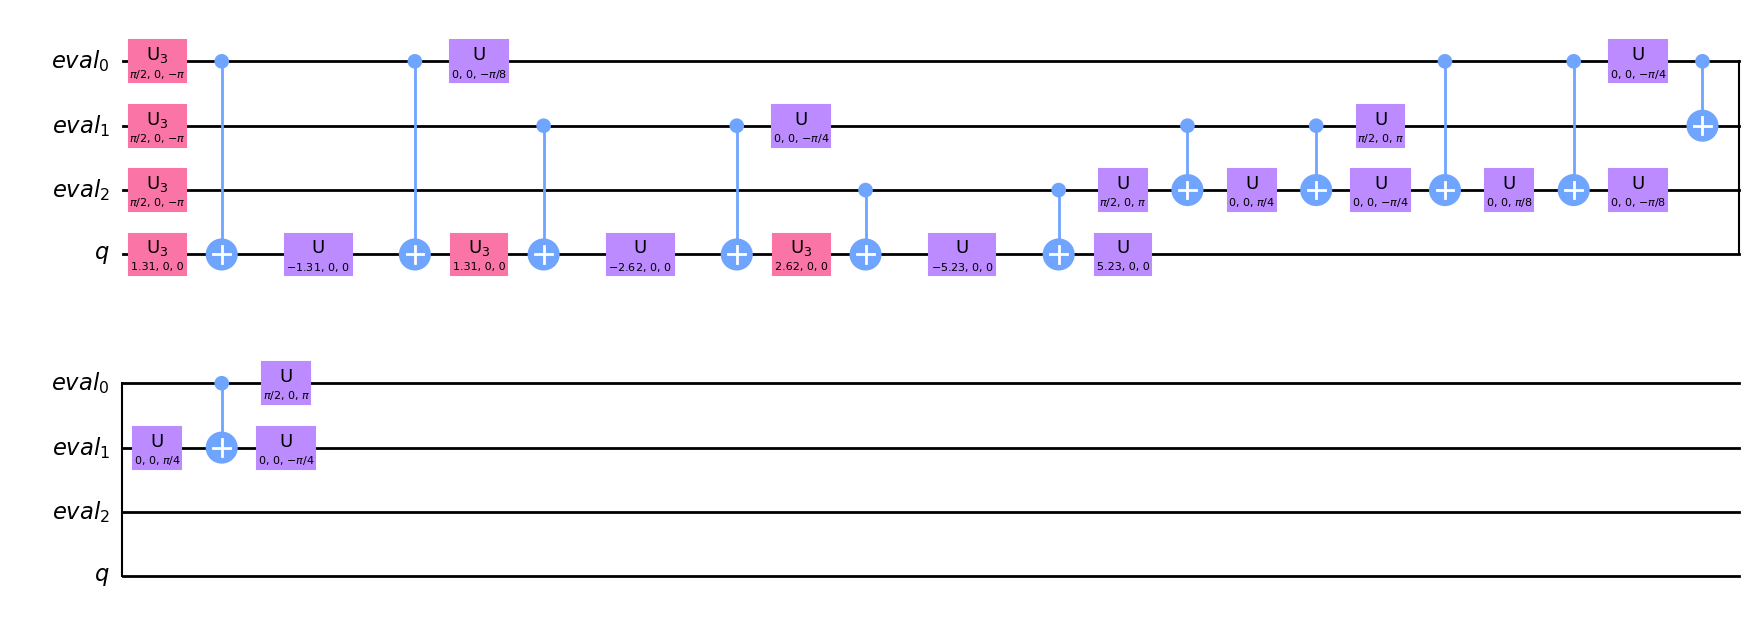

In [144]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl')

## backend 있이

In [145]:
backend = fp.FakeGuadalupe()

In [146]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

21

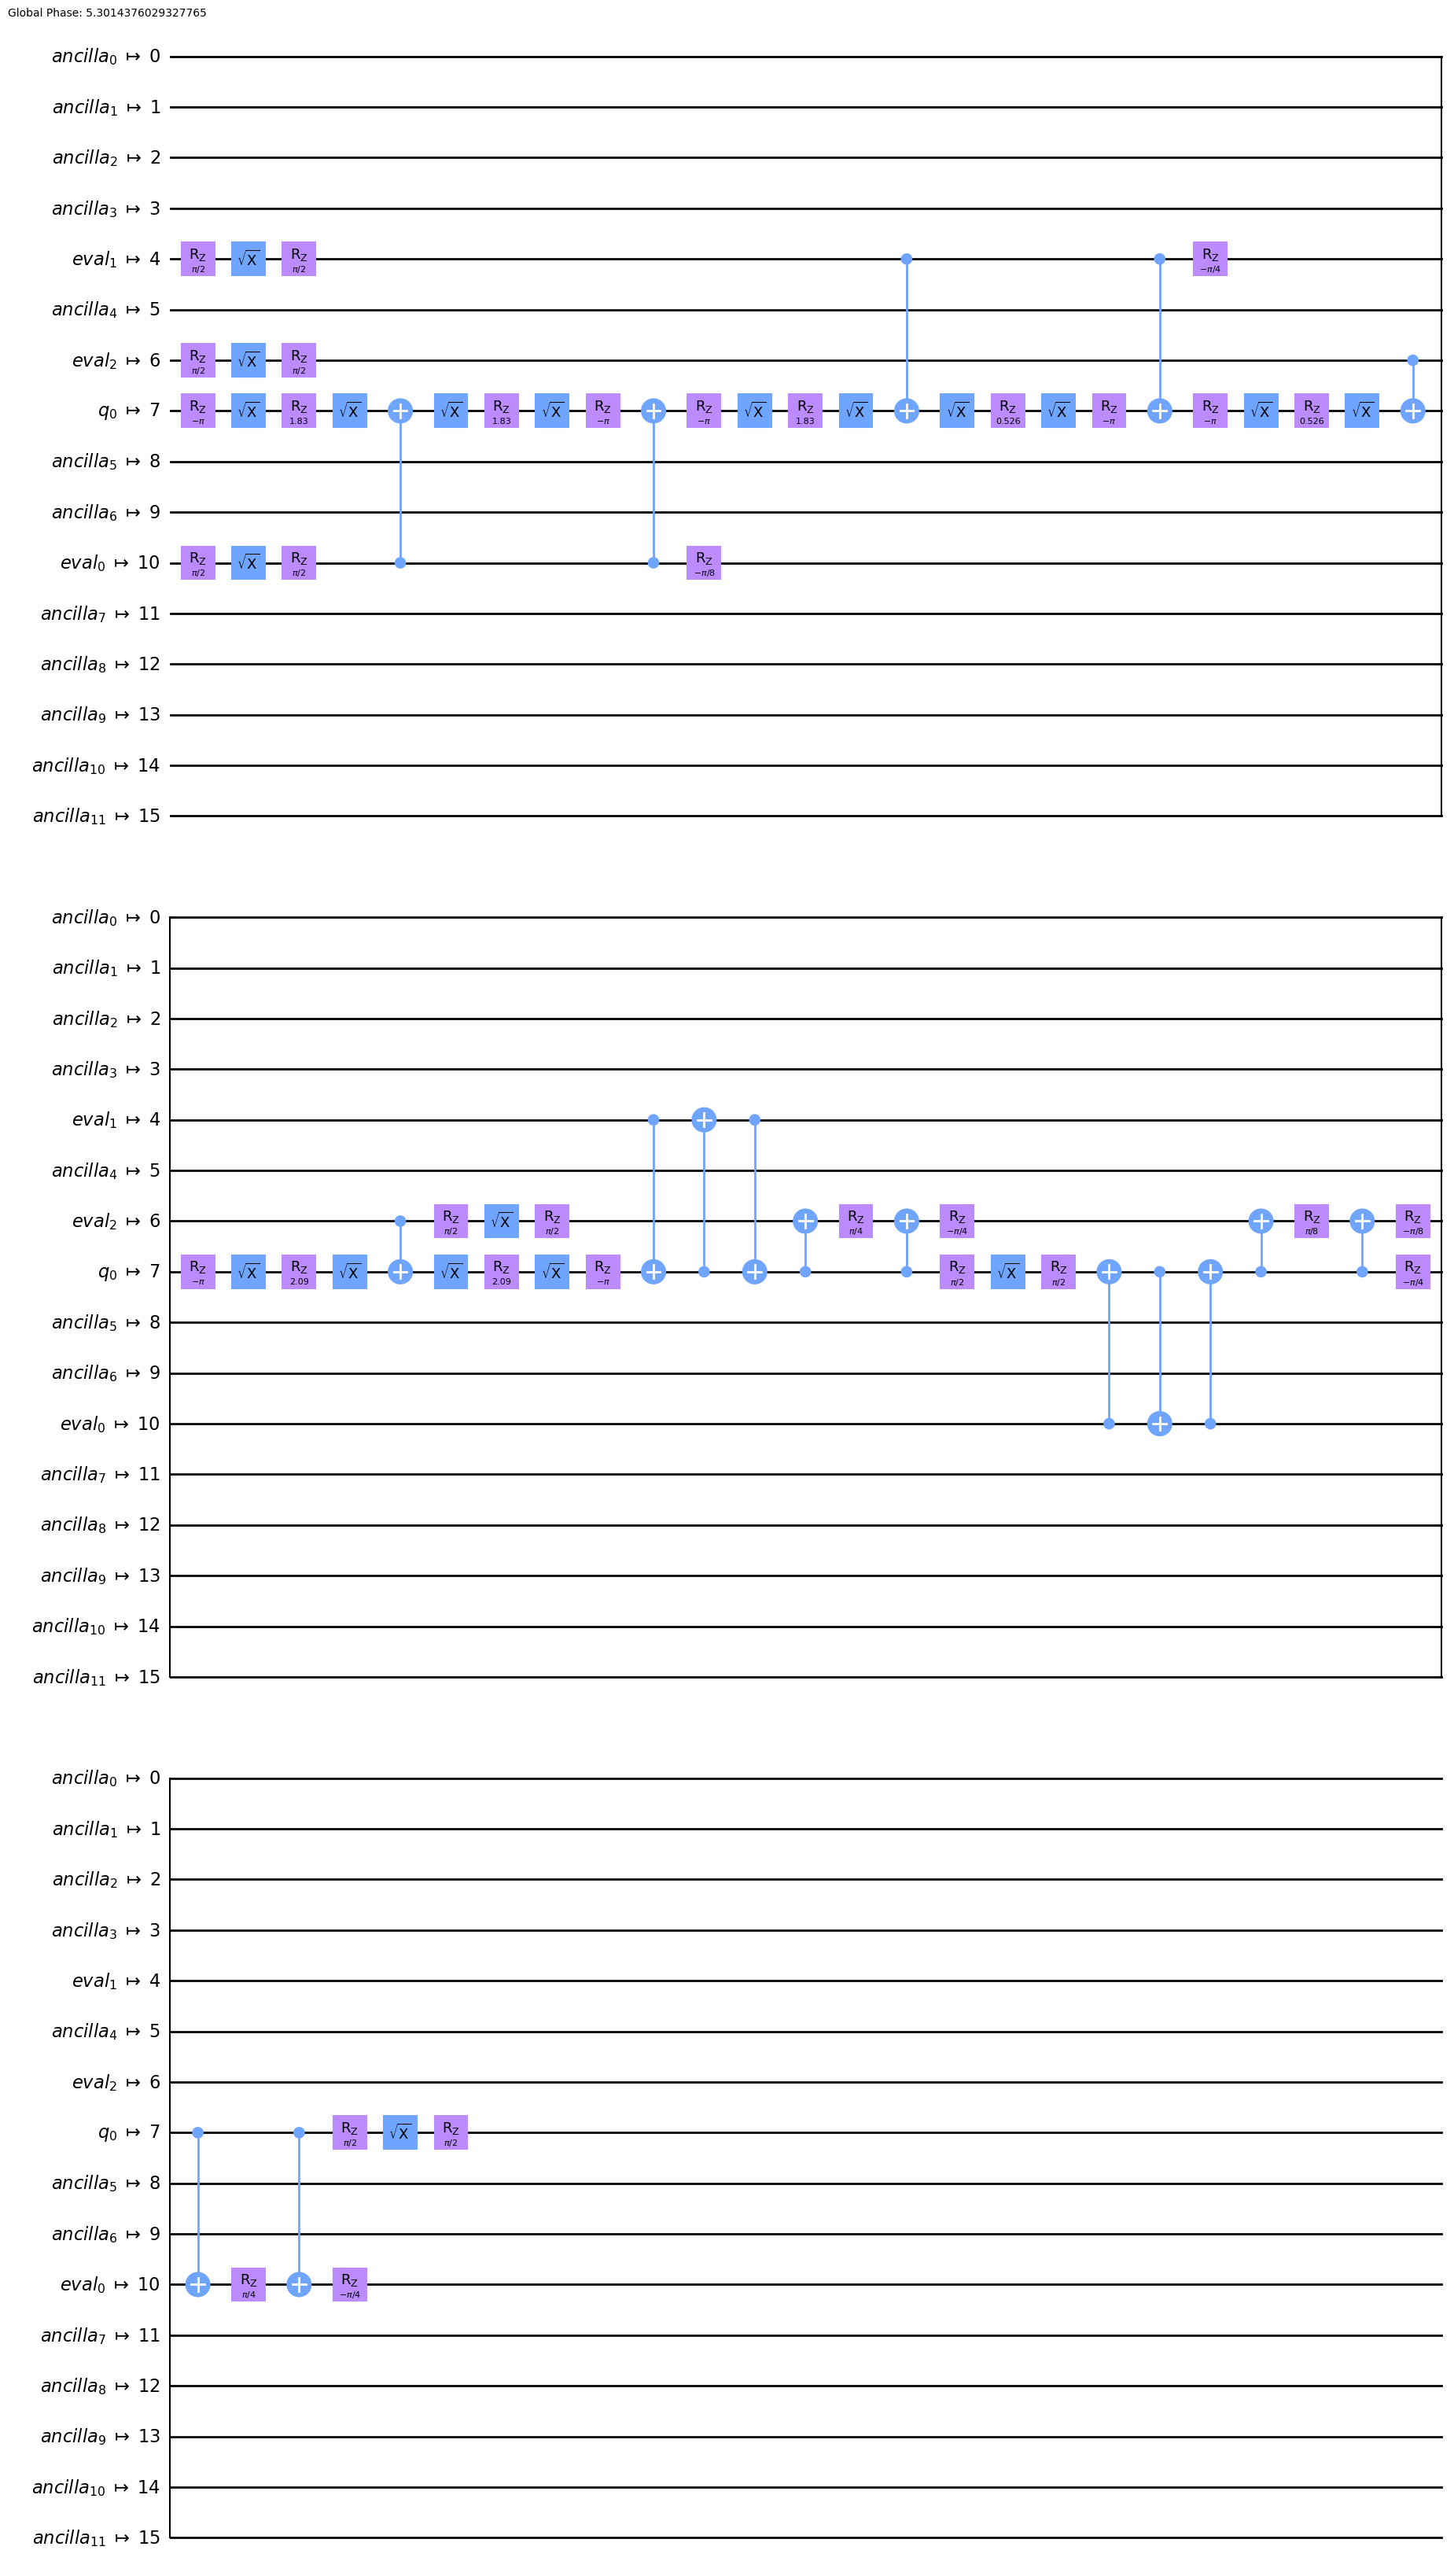

In [156]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl')

논문 그림 만들기... 흠,,,

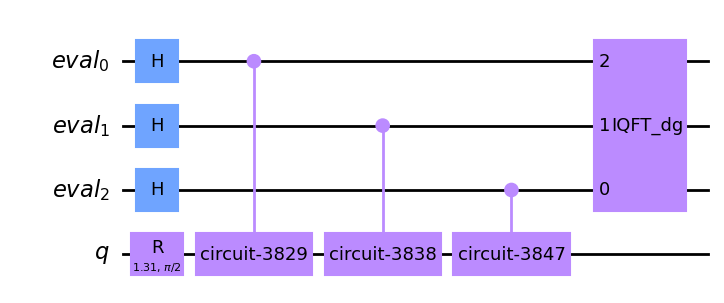

In [148]:
ae.construct_circuit(problem).decompose().draw(output='mpl')

In [154]:
ae.construct_circuit(problem).decompose()[:]

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='r', num_qubits=1, num_clbits=0, params=[1.3077741238864276, 1.5707963267948966]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='ccircuit-4022', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 0), Qubit(QuantumRegister(1, 'q'), 0)), clbits=()),
 CircuitInstruction(operation=Instruction(name='ccircuit-4031', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 1), Qubit(Qua

In [155]:
ae.construct_circuit(problem).decompose()[0:3]

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'eval'), 2),), clbits=())]

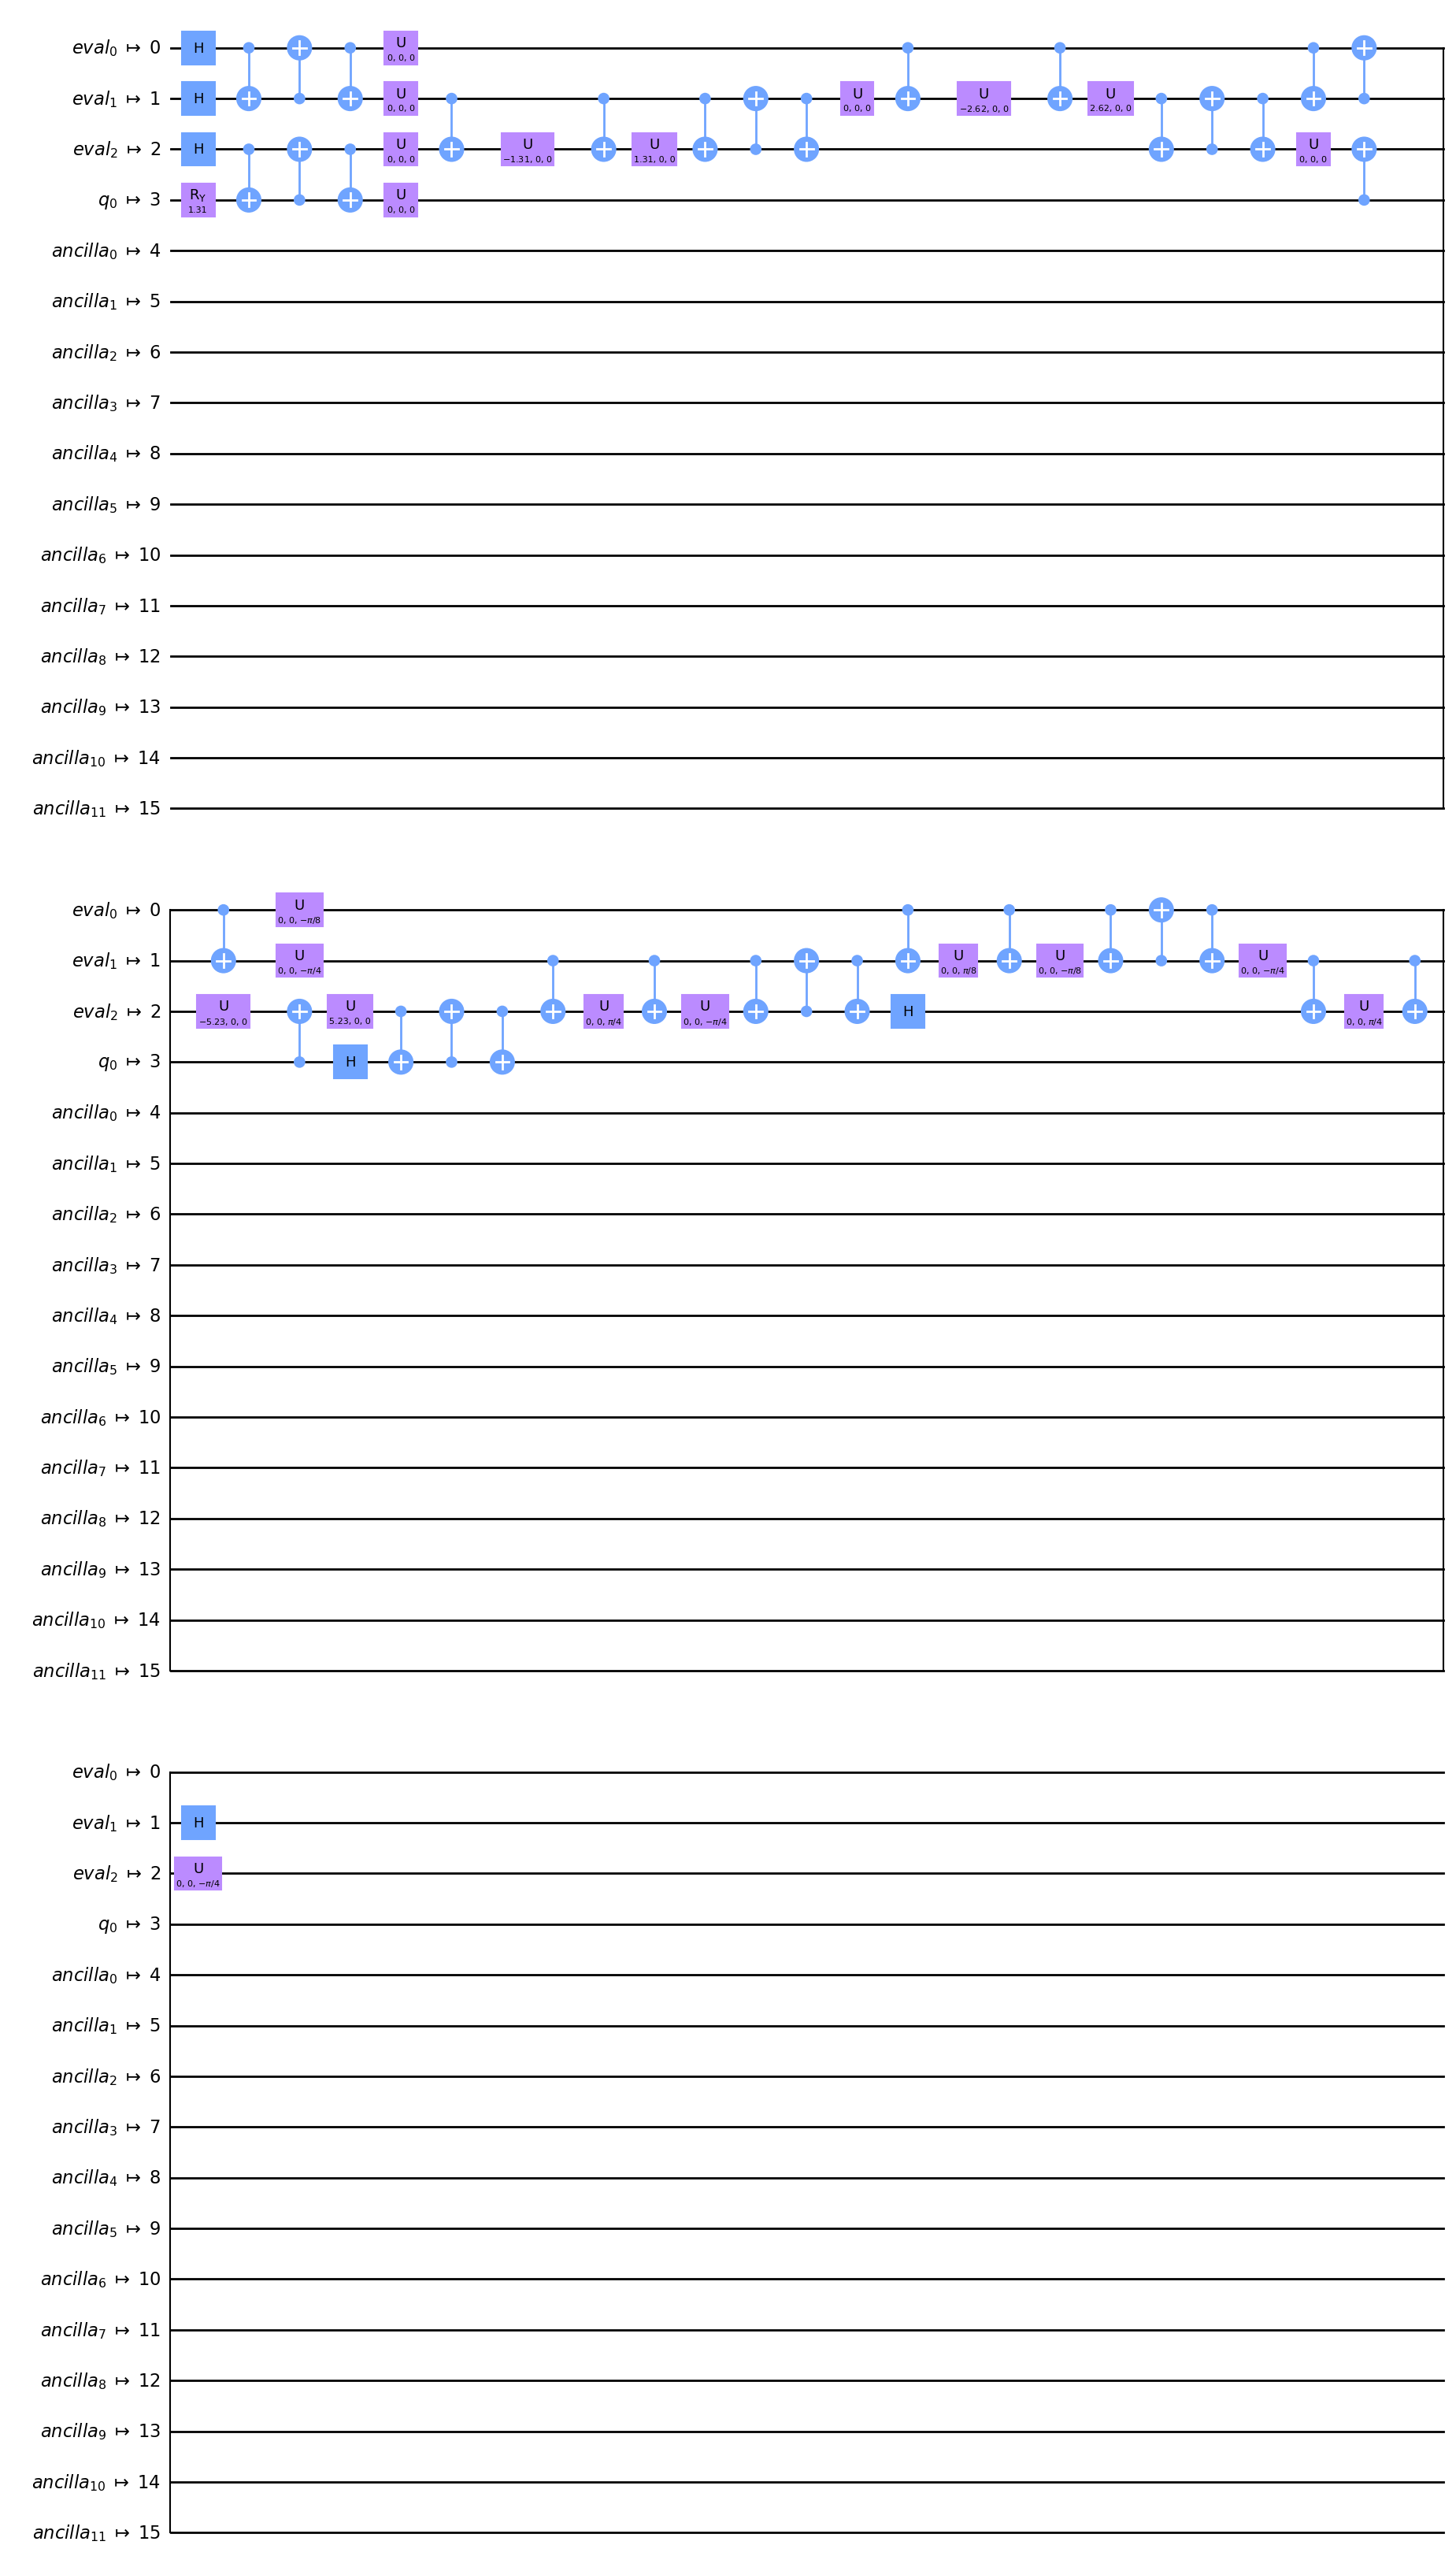

In [157]:
basis_gates = ["h", "ry", "cx",'u']
circuit_drawer(transpile(ae.construct_circuit(problem), 
                         backend=backend,
                         basis_gates=basis_gates,
                         optimization_level=0), 
               output='mpl')

In [159]:
p = 0.2

A = BernoulliA(p)
Q = BernoulliQ(p)

problem = EstimationProblem(state_preparation=A,
                            grover_operator=Q,
                            objective_qubits=[0])

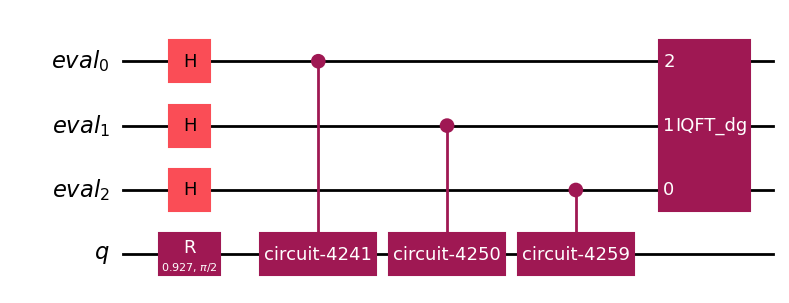

In [160]:
ae_circuit = ae.construct_circuit(problem)
ae_circuit.decompose().draw(
    "mpl", style="iqx"
)

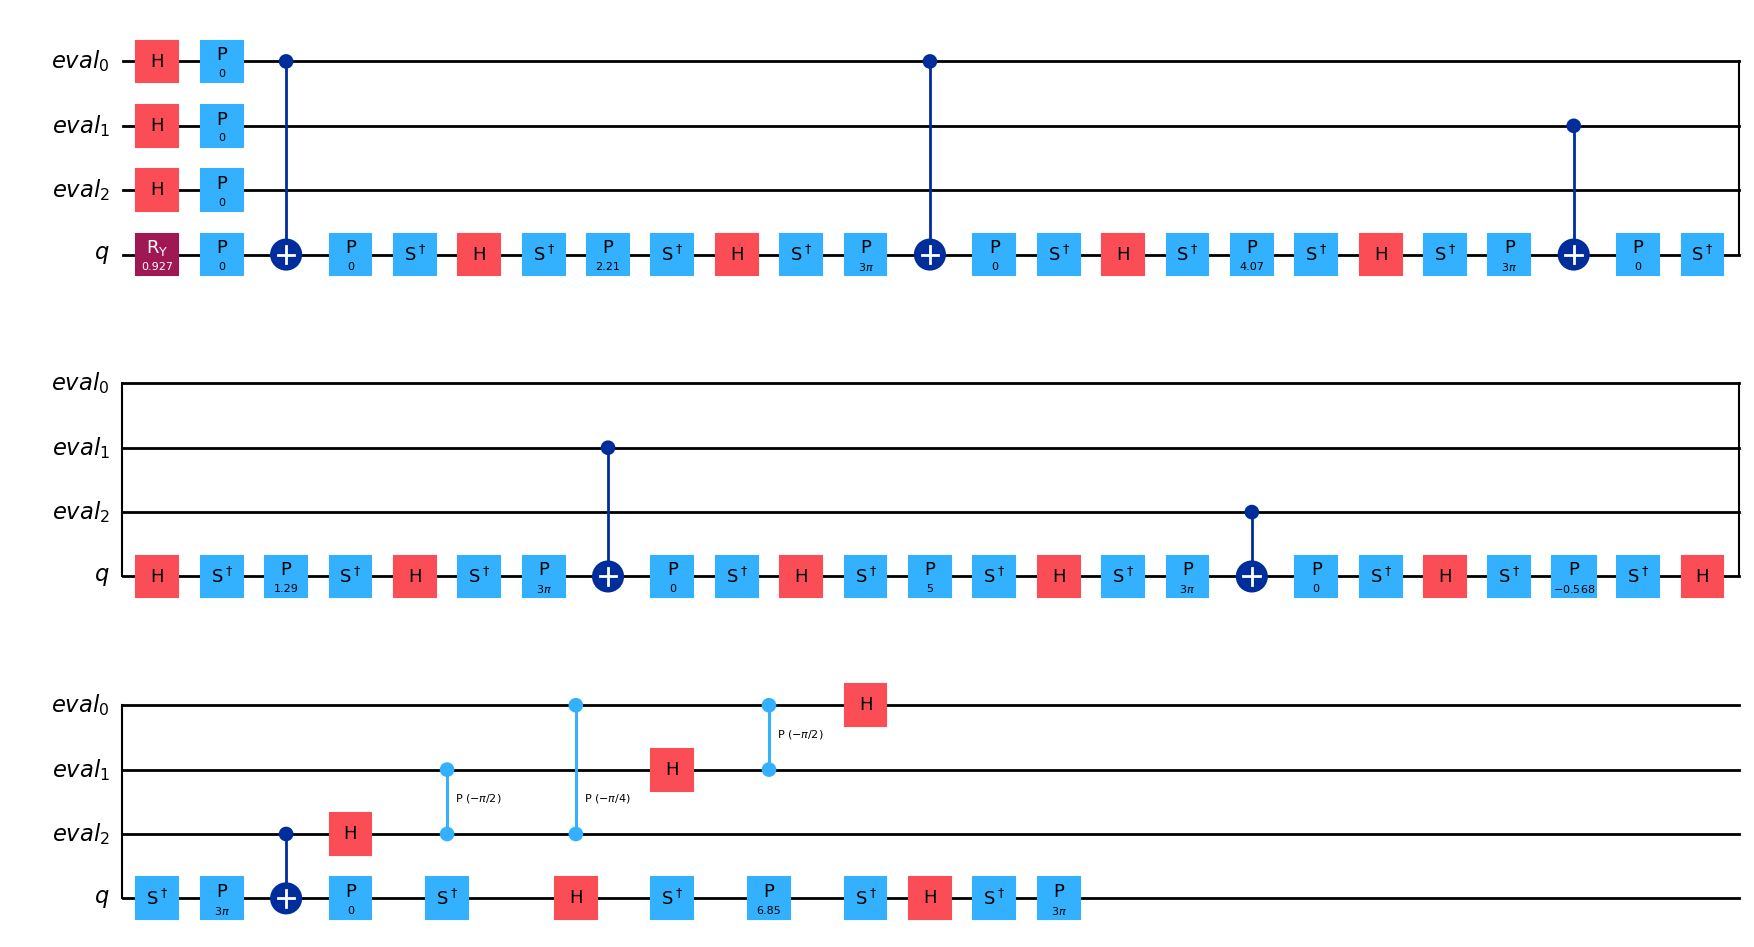

In [161]:
basis_gates = ["h", "ry", "cry", "cx", "ccx", "p", "cp", "x", "s", "sdg", "y", "t", "cz"]
#basis_gates = ["h", "ry", "cx", "x", "y"]
transpile(ae_circuit, basis_gates=basis_gates, optimization_level=2).draw("mpl", style="iqx")